# IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import cm

# LOAD DATA

In [2]:
df1 = pd.read_excel (r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Desa.xlsx.xlsx')
df2 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2018.xlsx')
df3 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2019.xlsx')
df4 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2020.xlsx')
df5 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2021.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# MERGE DATASET PENYERAPAN

In [3]:
df_penyerapan = pd.concat([df2, df3, df4, df5], ignore_index=True)
df_penyerapan

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1,persentase_realisasi_tahap_1,realisasi_tahap_2,persentase_realisasi_tahap_2,realisasi_tahap_3,persentase_realisasi_tahap_3
0,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pemberdayaan Masyarakat Desa,Pembentukan/Fasilitasi/Pelatihan/Pendampingan ...,0,0,0,0,2414000,100
1,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Penyelenggaraan Pos Kesehatan Desa (PKD)/Polin...,0,0,12800000,31,57619000,100
2,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Penyelenggaraan PAUD/TK/TPA/TKA/TPQ/Madrasah N...,0,0,4500000,13,21686000,100
3,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Fasilitas...,0,0,68434500,100,0,0
4,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Pemeliharaan Jalan Usaha Tani,0,0,13474125,39,34027125,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966556,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pemberdayaan Masyarakat Desa,Peningkatan kapasitas perangkat Desa,43603001,45,0,0,0,0
2966557,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",140406500,64,0,0,0,0
2966558,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pelaksanaan Pembangunan Desa,Penyusunan Dokumen Perencanaan Tata Ruang Desa,16775000,80,0,0,0,0
2966559,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitas/Peningkatan Fasilitas ...,53526866,90,0,0,0,0


# CHECK TYPE IN DATASET PENYERAPAN

In [4]:
df_penyerapan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966561 entries, 0 to 2966560
Data columns (total 14 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   kode_desa                     int64 
 1   tahun                         int64 
 2   nama_desa                     object
 3   nama_provinsi                 object
 4   nama_pemda                    object
 5   nama_kecamatan                object
 6   nama_bidang                   object
 7   nama_kegiatan                 object
 8   realisasi_tahap_1             int64 
 9   persentase_realisasi_tahap_1  int64 
 10  realisasi_tahap_2             int64 
 11  persentase_realisasi_tahap_2  int64 
 12  realisasi_tahap_3             int64 
 13  persentase_realisasi_tahap_3  int64 
dtypes: int64(8), object(6)
memory usage: 316.9+ MB


# RENAME FEATURE IN DATASET PENYERAPAN

In [5]:
df_penyerapan.rename(
    columns={"realisasi_tahap_1":"realisasi_tahap_1_Rp",
            "realisasi_tahap_2":"realisasi_tahap_2_Rp",
            "realisasi_tahap_3":"realisasi_tahap_3_Rp"}
          ,inplace=True)

In [6]:
df_penyerapan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966561 entries, 0 to 2966560
Data columns (total 14 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   kode_desa                     int64 
 1   tahun                         int64 
 2   nama_desa                     object
 3   nama_provinsi                 object
 4   nama_pemda                    object
 5   nama_kecamatan                object
 6   nama_bidang                   object
 7   nama_kegiatan                 object
 8   realisasi_tahap_1_Rp          int64 
 9   persentase_realisasi_tahap_1  int64 
 10  realisasi_tahap_2_Rp          int64 
 11  persentase_realisasi_tahap_2  int64 
 12  realisasi_tahap_3_Rp          int64 
 13  persentase_realisasi_tahap_3  int64 
dtypes: int64(8), object(6)
memory usage: 316.9+ MB


# CHECK NAN VALUES IN DATASET PENYERAPAN

In [7]:
df_penyerapan.isna().sum()

kode_desa                          0
tahun                              0
nama_desa                       1015
nama_provinsi                   1015
nama_pemda                      1015
nama_kecamatan                  1015
nama_bidang                        0
nama_kegiatan                      0
realisasi_tahap_1_Rp               0
persentase_realisasi_tahap_1       0
realisasi_tahap_2_Rp               0
persentase_realisasi_tahap_2       0
realisasi_tahap_3_Rp               0
persentase_realisasi_tahap_3       0
dtype: int64

In [8]:
bool_series = pd.isnull(df_penyerapan["nama_desa"])
df_penyerapan[bool_series]

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3
752755,1812042009,2018,NaN,NaN,NaN,NaN,Penyelenggaraan Pemerintahan Desa,Penyusunan Dokumen Keuangan Desa (APBDes/ APBD...,3501000,100,0,0,7435000,100
752756,1403092020,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Prasarana...,0,0,2062941,100,0,0
752757,1703142006,2018,NaN,NaN,NaN,NaN,Pemberdayaan Masyarakat Desa,Peningkatan kapasitas BPD,0,0,2445000,100,0,0
752758,1601092029,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengerasa...,0,0,199178500,100,0,0
752759,1601092016,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Penyelenggaraan PAUD/TK/TPA/TKA/TPQ/Madrasah N...,0,0,0,0,8600000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753765,7111012003,2018,NaN,NaN,NaN,NaN,Pemberdayaan Masyarakat Desa,Peningkatan Produksi Tanaman Pangan (Alat Prod...,0,0,82132000,94,0,0
753766,7111012003,2018,NaN,NaN,NaN,NaN,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,47400000,52,90590000,99,0,0
753767,1601092014,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengerasa...,0,0,92642500,41,223685500,100
753768,3510132017,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Dukungan pelaksanaan program Pembangunan/Rehab...,0,0,112500000,86,130000000,100


# MAKE DATASET PENYERAPAN IN JAWA TIMUR

In [9]:
df_penyerapan_jatim = df_penyerapan.loc[df_penyerapan['nama_provinsi'] == 'Jawa Timur']
df_penyerapan_jatim = df_penyerapan_jatim.reset_index(drop=True)
df_penyerapan_jatim

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3
0,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",7000000,100,0,0,0,0
1,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sanitasi ...,9953000,100,0,0,0,0
2,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengadaan...,0,0,199600000,100,0,0
3,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,0,0,24087600,100,30098400,100
4,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sistem Pe...,55481000,100,0,0,23000000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335904,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,Pemeliharaan Prasarana Jalan Desa (Gorong-goro...,4500000,100,0,0,0,0
335905,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pembinaan Kemasyarakatan Desa,Pembinaan PKK,20980000,0,0,0,0,0
335906,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pemberdayaan Masyarakat Desa,Pemeliharaan Pasar Desa/Kios milik Desa,3850000,0,0,0,0,0
335907,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",4400000,13,0,0,0,0


# EXPORT DATASET PENYERAPAN IN JAWA TIMUR

In [10]:
df_penyerapan_jatim.to_csv('D:\Bootcamp\DSLS\Dataset\Data_Final\jatim_dataset2.csv')

# CHECK UNIQUE VALUE IN DATASET PENYERAPAN IN JAWA TIMUR

In [11]:
df_penyerapan_jatim.nama_bidang.unique()

array(['Pelaksanaan Pembangunan Desa', 'Pembinaan Kemasyarakatan Desa',
       'Pemberdayaan Masyarakat Desa',
       'Penyelenggaraan Pemerintahan Desa',
       'Penanggulangan Bencana, Keadaan Darurat Dan Mendes', 'Pembiayaan'],
      dtype=object)

In [12]:
df_penyerapan_jatim.tahun.unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [13]:
df_penyerapan_jatim.nama_desa.unique()

array(['Abar-abir', 'Adan-adan', 'Aenganyar', ..., 'Mojongapit',
       'Mojowarno', 'Mudung'], dtype=object)

In [14]:
df_penyerapan_jatim.nunique()

kode_desa                        7722
tahun                               4
nama_desa                        5474
nama_provinsi                       1
nama_pemda                         30
nama_kecamatan                    572
nama_bidang                         6
nama_kegiatan                     281
realisasi_tahap_1_Rp            56605
persentase_realisasi_tahap_1      102
realisasi_tahap_2_Rp            68020
persentase_realisasi_tahap_2      107
realisasi_tahap_3_Rp            60331
persentase_realisasi_tahap_3      106
dtype: int64

In [15]:
df_penyerapan_jatim.persentase_realisasi_tahap_2.unique()

array([  0, 100,  47,  50,  99,  51,  39,  83,  31,  94,  98,  79,  70,
        60,  80,  20,  75,  62,  56,  55,  52,  40,  87,  90,  73,  15,
        21,  63,  23,  67,  46,  92,  64,  30,  68,  41,  82,   8,   6,
        85,  58,  34,  25,  54,   1,  53,  65,  95,  93,  45,  72,  76,
        29,   7,  10,  69,  88,  33,  18,  57,   2,  96,  91,  37,  13,
        48,  71,  44,  74,  27,  28,  43,  66,  49,   5,  36,  42,  32,
        59,  84,  24,  61,  86,  35,   3,  81,  89,  78,  38,  77,  97,
        16,  11,  22,  14,  26,  12,  19,  17,   9,   4, 980, 200, 141,
       921, 401, 117], dtype=int64)

In [16]:
df_penyerapan_jatim.nama_kegiatan.unique()

array(['Penyelenggaraan Posyandu (Makanan Tambahan, Kelas ',
       'Pembangunan/Rehabilitasi/Peningkatan Sanitasi Perm',
       'Pembangunan/Rehabilitasi/Peningkatan/Pengadaan Sar',
       'Pembangunan/Rehabilitasi/Peningkatan Sarana dan Pr',
       'Pembangunan/Rehabilitasi/Peningkatan Sistem Pembua',
       'Pembangunan/Rehabilitasi/Peningkatan/Pengerasan Ja',
       'Penyelenggaraan PAUD/TK/TPA/TKA/TPQ/Madrasah Non-F',
       'Kegiatan Pembangunan / Pemeliharaan Saluran Irigas',
       'Pengelolaan Lingkungan Hidup Desa',
       'Pembangunan Tembok Penahan Tanah',
       'Pengembangan Sistem Informasi Desa ',
       'Pelatihan/Penyuluhan Pemberdayaan Perempuan',
       'Dukungan pelaksanaan program Pembangunan/Rehab Rum',
       'Pemeliharaan Jalan Desa',
       'Kegiatan Pembentukan dan Fasilitasi Kader Pembangu',
       'Penyelenggaraan Pos Kesehatan Desa (PKD)/Polindes ',
       'Penyertaan Modal BUM Desa',
       'Pembangunan/Rehabilitasi/Peningkatan Prasarana Jal',
       'Pem

# MAKE FEATURE ENGINEERING ABOUT KETIDAKWAJARAN LAPORAN

In [17]:
df_penyerapan_jatim['ketidakwajaran_laporan'] = np.where(df_penyerapan_jatim['nama_kegiatan'] == 'tes', 1, 
                                                np.where((df_penyerapan_jatim['persentase_realisasi_tahap_1'] > 100) |
                                                        (df_penyerapan_jatim['persentase_realisasi_tahap_2'] > 100) |
                                                        (df_penyerapan_jatim['persentase_realisasi_tahap_3'] > 100), 1,
                                                np.where(((df_penyerapan_jatim['realisasi_tahap_1_Rp'] == 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_2_Rp'] == 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_3_Rp'] == 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_3'] != 0)), 1,
                                                np.where((df_penyerapan_jatim['realisasi_tahap_1_Rp'] == 0) &
                                                        (df_penyerapan_jatim['realisasi_tahap_2_Rp'] == 0) &
                                                        (df_penyerapan_jatim['realisasi_tahap_3_Rp'] == 0), 1,
                                                np.where(((df_penyerapan_jatim['realisasi_tahap_1_Rp'] != 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_2_Rp'] != 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_3_Rp'] != 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)), 1,0)))))
df_penyerapan_jatim

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3,ketidakwajaran_laporan
0,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",7000000,100,0,0,0,0,0
1,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sanitasi ...,9953000,100,0,0,0,0,0
2,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengadaan...,0,0,199600000,100,0,0,0
3,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,0,0,24087600,100,30098400,100,0
4,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sistem Pe...,55481000,100,0,0,23000000,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335904,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,Pemeliharaan Prasarana Jalan Desa (Gorong-goro...,4500000,100,0,0,0,0,0
335905,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pembinaan Kemasyarakatan Desa,Pembinaan PKK,20980000,0,0,0,0,0,1
335906,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pemberdayaan Masyarakat Desa,Pemeliharaan Pasar Desa/Kios milik Desa,3850000,0,0,0,0,0,1
335907,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",4400000,13,0,0,0,0,0


# MAKE TOTAL PENYERAPAN IN DATA PENYERAPAN JAWA TIMUR

In [18]:
df_penyerapan_jatim['total_penyerapan'] = np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 0) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)), 
                                                   df_penyerapan_jatim['realisasi_tahap_1_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)),
                                                   df_penyerapan_jatim['realisasi_tahap_2_Rp'], ( 
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] != 100)), 
                                                   df_penyerapan_jatim['realisasi_tahap_1_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_1_Rp'], ( 
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'] + df_penyerapan_jatim['realisasi_tahap_1_Rp']
                                                   , (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 0) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)), 
                                                   df_penyerapan_jatim['realisasi_tahap_1_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)),
                                                   df_penyerapan_jatim['realisasi_tahap_2_Rp'], ( 
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] != 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'],
                                                  df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'] + df_penyerapan_jatim['realisasi_tahap_1_Rp'])))))))))))))))))))
df_penyerapan_jatim

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3,ketidakwajaran_laporan,total_penyerapan
0,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",7000000,100,0,0,0,0,0,7000000
1,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sanitasi ...,9953000,100,0,0,0,0,0,9953000
2,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengadaan...,0,0,199600000,100,0,0,0,199600000
3,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,0,0,24087600,100,30098400,100,0,54186000
4,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sistem Pe...,55481000,100,0,0,23000000,100,0,78481000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335904,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,Pemeliharaan Prasarana Jalan Desa (Gorong-goro...,4500000,100,0,0,0,0,0,4500000
335905,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pembinaan Kemasyarakatan Desa,Pembinaan PKK,20980000,0,0,0,0,0,1,20980000
335906,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pemberdayaan Masyarakat Desa,Pemeliharaan Pasar Desa/Kios milik Desa,3850000,0,0,0,0,0,1,3850000
335907,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",4400000,13,0,0,0,0,0,4400000


In [19]:
df_penyerapan_jatim.loc[df_penyerapan_jatim['total_penyerapan'] == 0]

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3,ketidakwajaran_laporan,total_penyerapan
6050,3523122009,2018,Beji,Jawa Timur,Kab. Tuban,Jenu,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",0,0,0,0,0,0,1,0
6216,3523062005,2018,Belikanget,Jawa Timur,Kab. Tuban,Tambakboyo,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitas/Peningkatan Fasilitas ...,0,0,0,0,0,0,1,0
6236,3516122003,2018,Beloh,Jawa Timur,Kab. Mojokerto,Trowulan,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengerasa...,0,0,0,0,0,0,1,0
6928,3523022007,2018,Besowo,Jawa Timur,Kab. Tuban,Jatirogo,Penyelenggaraan Pemerintahan Desa,Penyelenggaraan Lomba antar kewilayahan dan pe...,0,0,0,0,0,0,1,0
6947,3523022007,2018,Besowo,Jawa Timur,Kab. Tuban,Jatirogo,Pemberdayaan Masyarakat Desa,Penyertaan Modal BUM Desa,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334523,3501112014,2021,Wonodadi Wetan,Jawa Timur,Kab. Pacitan,Ngadirojo,Penyelenggaraan Pemerintahan Desa,Pelaksanaan Pemilihan Kepala Desa,0,0,4200000,0,0,0,1,0
334712,3513012007,2021,Wonokerto,Jawa Timur,Kab. Probolinggo,Sukapura,Pembiayaan,Penyertaan Modal,40000000,0,0,0,0,23,1,0
334826,3504092020,2021,Wonokromo,Jawa Timur,Kab. Tulungagung,Gondang,Penyelenggaraan Pemerintahan Desa,Penyediaan Insentif/Operasional RT/RW,0,0,1700000,0,0,0,1,0
334833,3504092020,2021,Wonokromo,Jawa Timur,Kab. Tulungagung,Gondang,Pemberdayaan Masyarakat Desa,Pelatihan/Penyuluhan Pemberdayaan Perempuan,0,0,6134350,0,0,0,1,0


# DROP COLUMN IN DATASET PENYERAPAN IN JAWA TIMUR EVERY YEAR

In [20]:
df_penyerapan_jatim = df_penyerapan_jatim.drop(columns=['nama_desa', 'realisasi_tahap_1_Rp', 'persentase_realisasi_tahap_1', 'realisasi_tahap_2_Rp', 'persentase_realisasi_tahap_2', 'realisasi_tahap_3_Rp', 'persentase_realisasi_tahap_3'])

In [37]:
df_2018 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018_sum = df_2018.groupby('kode_desa').sum()
df_2018_sum['tahun'] = 2018
df_2018_sum = df_2018_sum.reset_index()
df_2018_sum['kode_desa'] = df_2018_sum['kode_desa'].apply(str)
df_2018_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2018,0,979226000
1,3501012002,2018,0,681726400
2,3501012003,2018,0,691941825
3,3501012004,2018,0,715908600
4,3501012005,2018,0,739799300
...,...,...,...,...
7672,3579032003,2018,0,645795613
7673,3579032004,2018,0,155414400
7674,3579032005,2018,0,514940000
7675,3579032006,2018,0,809375178


In [36]:
df_2019 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019_sum = df_2019.groupby('kode_desa').sum()
df_2019_sum['tahun'] = 2019
df_2019_sum = df_2019_sum.reset_index()
df_2019_sum['kode_desa'] = df_2019_sum['kode_desa'].apply(str)
df_2019_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2019,0,378595000
1,3501012002,2019,0,109673163
2,3501012003,2019,0,384736000
3,3501012004,2019,0,379626000
4,3501012005,2019,0,196580000
...,...,...,...,...
6683,3579032003,2019,0,44877907
6684,3579032004,2019,0,81046500
6685,3579032005,2019,0,280643384
6686,3579032006,2019,0,333898800


In [35]:
df_2020 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020_sum = df_2020.groupby('kode_desa').sum()
df_2020_sum['tahun'] = 2020
df_2020_sum = df_2020_sum.reset_index()
df_2020_sum['kode_desa'] = df_2020_sum['kode_desa'].apply(str)
df_2020_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2020,0,1316422800
1,3501012002,2020,3,720348100
2,3501012003,2020,0,1256159000
3,3501012004,2020,0,1469550000
4,3501012005,2020,0,1039273200
...,...,...,...,...
7716,3579032003,2020,0,1936617250
7717,3579032004,2020,1,1314426308
7718,3579032005,2020,0,1423909592
7719,3579032006,2020,0,1295563200


In [34]:
df_2021 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021_sum = df_2021.groupby('kode_desa').sum()
df_2021_sum['tahun'] = 2021
df_2021_sum = df_2021_sum.reset_index()
df_2021_sum['kode_desa'] = df_2021_sum['kode_desa'].apply(str)
df_2021_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2021,0,553396950
1,3501012002,2021,0,700578200
2,3501012003,2021,0,233784600
3,3501012004,2021,0,1006508100
4,3501012005,2021,1,297192000
...,...,...,...,...
7713,3579032003,2021,0,337683624
7714,3579032004,2021,0,189472200
7715,3579032005,2021,0,285633594
7716,3579032006,2021,0,363328500


# Merge Dataset

In [142]:
df_desa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298705 entries, 0 to 298704
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   nama_provinsi    298705 non-null  object
 1   nama_pemda       298705 non-null  object
 2   nama_desa        298705 non-null  object
 3   kode_pum         298705 non-null  object
 4   jumlah_kk        147490 non-null  object
 5   jumlah_penduduk  147490 non-null  object
 6   tahun            298704 non-null  object
 7   pagu             298704 non-null  object
 8   penyaluran       297635 non-null  object
dtypes: object(9)
memory usage: 20.5+ MB


In [143]:
df_desa = df1
df_desa_jatim = df_desa.loc[df_penyerapan['nama_provinsi'] == 'Jawa Timur']
df_desa_jatim = df_desa_jatim.drop(columns=['nama_provinsi', 'nama_pemda', 'nama_desa', 'jumlah_kk', 'jumlah_penduduk'])
df_desa_jatim.rename(
    columns={"kode_pum":"kode_desa"},inplace=True)
df_desa_jatim['penyaluran'] = df_desa_jatim['penyaluran'].astype(str).astype(float)
df_desa_jatim

,kode_desa,tahun,pagu,penyaluran
106,7308032003,2019.0,1144213000.0,1.144213e+09
107,7308102008,2019.0,1049817000.0,1.049817e+09
108,7308032003,2020.0,998683000.0,7.490122e+08
109,7308102008,2020.0,1119027000.0,5.595135e+08
110,7308032003,2021.0,968270000.0,5.334640e+07
...,...,...,...,...
298509,9118112004,2018.0,822223000.0,1.046218e+09
298510,9118112004,2019.0,1633828000.0,1.633828e+09
298511,9118112004,2020.0,1450390000.0,7.251950e+08
298512,9118112004,2021.0,1480699000.0,2.818237e+08


In [144]:
df_2021_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7718 entries, 0 to 7717
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   kode_desa               7718 non-null   object
 1   tahun                   7718 non-null   int64 
 2   ketidakwajaran_laporan  7718 non-null   int32 
 3   total_penyerapan        7718 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 211.2+ KB


In [145]:
df_2021_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2021]
df_2021_desa = df_2021_desa.reset_index(drop=True)
df_2021_full = pd.merge(df_2021_desa, df_2021_sum, on="kode_desa")
df_2021_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3507332004,2021.0,936949000.0,7.495592e+07,2021,0,388922000
1,3520162006,2021.0,795927000.0,2.679708e+08,2021,0,261935000
2,3525152016,2021.0,1128410000.0,3.088640e+08,2021,0,423775000
3,3522042009,2021.0,1055888000.0,8.147104e+08,2021,0,804246300
4,3507032007,2021.0,1593039000.0,4.977156e+08,2021,0,539904700
...,...,...,...,...,...,...,...
1004,3514042003,2021.0,939828000.0,7.518624e+07,2021,1,185670000
1005,3518162020,2021.0,982209000.0,3.553836e+08,2021,0,371354200
1006,3523192009,2021.0,902400000.0,4.994400e+08,2021,0,303153400
1007,3521122008,2021.0,1305544000.0,1.204744e+09,2021,0,586371400


In [146]:
df_2020_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2020]
df_2020_desa = df_2020_desa.reset_index(drop=True)
df_2020_full = pd.merge(df_2020_desa, df_2020_sum, on="kode_desa")
df_2020_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3507332004,2020.0,977997000.0,733497750.0,2020,3,987149500
1,3520162006,2020.0,807138000.0,605353500.0,2020,1,737101100
2,3525152016,2020.0,756125000.0,567093750.0,2020,0,680815404
3,3507322008,2020.0,1052337000.0,789252750.0,2020,2,761100772
4,3525012006,2020.0,899055000.0,674291250.0,2020,0,850605000
...,...,...,...,...,...,...,...
976,3514042003,2020.0,928192000.0,696144000.0,2020,0,1466687500
977,3518162020,2020.0,995260000.0,746445000.0,2020,0,973512600
978,3523192009,2020.0,843644000.0,632733000.0,2020,0,889948800
979,3521122008,2020.0,983376000.0,983376000.0,2020,0,774016000


In [147]:
df_2019_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2019]
df_2019_desa = df_2019_desa.reset_index(drop=True)
df_2019_full = pd.merge(df_2019_desa, df_2019_sum, on="kode_desa")
df_2019_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3520162006,2019.0,805930000.0,8.059300e+08,2019,0,362596000
1,3525152016,2019.0,765542000.0,7.655420e+08,2019,0,195750000
2,3522042009,2019.0,978805100.0,9.788051e+08,2019,0,156051500
3,3507032007,2019.0,1211045000.0,1.211045e+09,2019,0,261156800
4,3507322008,2019.0,995213000.0,1.194256e+09,2019,1,296199220
...,...,...,...,...,...,...,...
849,3514042003,2019.0,1151358000.0,1.151358e+09,2019,0,618647000
850,3518162020,2019.0,971472000.0,9.714720e+08,2019,0,436352800
851,3523192009,2019.0,840639000.0,8.406390e+08,2019,0,502118000
852,3521122008,2019.0,1007259000.0,1.007259e+09,2019,0,282000000


In [148]:
df_2018_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2018]
df_2018_desa = df_2018_desa.reset_index(drop=True)
df_2018_full = pd.merge(df_2018_desa, df_2018_sum, on="kode_desa")
df_2018_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3529092001,2018.0,1017668000.0,1.017668e+09,2018,0,532151075
1,3520162006,2018.0,707393000.0,7.073930e+08,2018,0,705597100
2,3525152016,2018.0,697353000.0,6.973530e+08,2018,0,500660050
3,3524172013,2018.0,715544000.0,7.155440e+08,2018,0,529999200
4,3507322008,2018.0,837775000.0,8.377750e+08,2018,0,998566359
...,...,...,...,...,...,...,...
983,3522142008,2018.0,725310900.0,7.253109e+08,2018,0,721730000
984,3514042003,2018.0,957363000.0,9.573630e+08,2018,0,595165000
985,3518162020,2018.0,821150000.0,8.211500e+08,2018,0,821150000
986,3523192009,2018.0,731152000.0,7.311520e+08,2018,0,704402000


In [149]:
df_full = pd.concat([df_2018_full, df_2019_full, df_2020_full], ignore_index=True)
df_full = df_full.drop(columns='tahun_x')
df_full

,kode_desa,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359
...,...,...,...,...,...,...
2818,3514042003,928192000.0,6.961440e+08,2020,0,1466687500
2819,3518162020,995260000.0,7.464450e+08,2020,0,973512600
2820,3523192009,843644000.0,6.327330e+08,2020,0,889948800
2821,3521122008,983376000.0,9.833760e+08,2020,0,774016000


In [150]:
df_2021_full_pred = df_2021_full.drop(columns='tahun_x')
df_2021_full_pred

,kode_desa,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3507332004,936949000.0,7.495592e+07,2021,0,388922000
1,3520162006,795927000.0,2.679708e+08,2021,0,261935000
2,3525152016,1128410000.0,3.088640e+08,2021,0,423775000
3,3522042009,1055888000.0,8.147104e+08,2021,0,804246300
4,3507032007,1593039000.0,4.977156e+08,2021,0,539904700
...,...,...,...,...,...,...
1004,3514042003,939828000.0,7.518624e+07,2021,1,185670000
1005,3518162020,982209000.0,3.553836e+08,2021,0,371354200
1006,3523192009,902400000.0,4.994400e+08,2021,0,303153400
1007,3521122008,1305544000.0,1.204744e+09,2021,0,586371400


In [151]:
df_full.rename(
    columns={"tahun_y":"tahun"}
          ,inplace=True)
df_full

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359
...,...,...,...,...,...,...
2818,3514042003,928192000.0,6.961440e+08,2020,0,1466687500
2819,3518162020,995260000.0,7.464450e+08,2020,0,973512600
2820,3523192009,843644000.0,6.327330e+08,2020,0,889948800
2821,3521122008,983376000.0,9.833760e+08,2020,0,774016000


In [152]:
df_2021_full_pred.rename(
    columns={"tahun_y":"tahun"}
          ,inplace=True)
df_2021_full_pred

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan
0,3507332004,936949000.0,7.495592e+07,2021,0,388922000
1,3520162006,795927000.0,2.679708e+08,2021,0,261935000
2,3525152016,1128410000.0,3.088640e+08,2021,0,423775000
3,3522042009,1055888000.0,8.147104e+08,2021,0,804246300
4,3507032007,1593039000.0,4.977156e+08,2021,0,539904700
...,...,...,...,...,...,...
1004,3514042003,939828000.0,7.518624e+07,2021,1,185670000
1005,3518162020,982209000.0,3.553836e+08,2021,0,371354200
1006,3523192009,902400000.0,4.994400e+08,2021,0,303153400
1007,3521122008,1305544000.0,1.204744e+09,2021,0,586371400


In [153]:
df_full['selisih_penyaluran_penyerapan'] = np.where((df_full['total_penyerapan'] - df_full['penyaluran']) > 0, ((df_full['total_penyerapan'] - df_full['penyaluran'])/df_full['penyaluran']), (df_full['penyaluran'] - df_full['total_penyerapan'])/df_full['penyaluran'])
df_full

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan,selisih_penyaluran_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075,0.477088
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100,0.002539
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050,0.282057
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200,0.259306
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359,0.191927
...,...,...,...,...,...,...,...
2818,3514042003,928192000.0,6.961440e+08,2020,0,1466687500,1.106874
2819,3518162020,995260000.0,7.464450e+08,2020,0,973512600,0.304199
2820,3523192009,843644000.0,6.327330e+08,2020,0,889948800,0.406516
2821,3521122008,983376000.0,9.833760e+08,2020,0,774016000,0.212899


In [154]:
df_2021_full_pred['selisih_penyaluran_penyerapan'] = np.where((df_2021_full_pred['total_penyerapan'] - df_2021_full_pred['penyaluran']) > 0, ((df_2021_full_pred['total_penyerapan'] - df_2021_full_pred['penyaluran'])/df_2021_full_pred['penyaluran']), (df_2021_full_pred['penyaluran'] - df_2021_full_pred['total_penyerapan'])/df_2021_full_pred['penyaluran'])
df_2021_full_pred

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan,selisih_penyaluran_penyerapan
0,3507332004,936949000.0,7.495592e+07,2021,0,388922000,4.188676
1,3520162006,795927000.0,2.679708e+08,2021,0,261935000,0.022524
2,3525152016,1128410000.0,3.088640e+08,2021,0,423775000,0.372044
3,3522042009,1055888000.0,8.147104e+08,2021,0,804246300,0.012844
4,3507032007,1593039000.0,4.977156e+08,2021,0,539904700,0.084765
...,...,...,...,...,...,...,...
1004,3514042003,939828000.0,7.518624e+07,2021,1,185670000,1.469468
1005,3518162020,982209000.0,3.553836e+08,2021,0,371354200,0.044939
1006,3523192009,902400000.0,4.994400e+08,2021,0,303153400,0.393013
1007,3521122008,1305544000.0,1.204744e+09,2021,0,586371400,0.513281


# Make Isolation Forest

In [155]:
df_full_train = df_full.drop(columns=['kode_desa', 'pagu', 'tahun'])
df_full_train

,penyaluran,ketidakwajaran_laporan,total_penyerapan,selisih_penyaluran_penyerapan
0,1.017668e+09,0,532151075,0.477088
1,7.073930e+08,0,705597100,0.002539
2,6.973530e+08,0,500660050,0.282057
3,7.155440e+08,0,529999200,0.259306
4,8.377750e+08,0,998566359,0.191927
...,...,...,...,...
2818,6.961440e+08,0,1466687500,1.106874
2819,7.464450e+08,0,973512600,0.304199
2820,6.327330e+08,0,889948800,0.406516
2821,9.833760e+08,0,774016000,0.212899


In [156]:
df_full_pred = df_2021_full_pred.drop(columns=['kode_desa', 'pagu', 'tahun'])
df_full_pred

,penyaluran,ketidakwajaran_laporan,total_penyerapan,selisih_penyaluran_penyerapan
0,7.495592e+07,0,388922000,4.188676
1,2.679708e+08,0,261935000,0.022524
2,3.088640e+08,0,423775000,0.372044
3,8.147104e+08,0,804246300,0.012844
4,4.977156e+08,0,539904700,0.084765
...,...,...,...,...
1004,7.518624e+07,1,185670000,1.469468
1005,3.553836e+08,0,371354200,0.044939
1006,4.994400e+08,0,303153400,0.393013
1007,1.204744e+09,0,586371400,0.513281


In [157]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples='auto',random_state=rs, contamination='auto') 
clf.fit(df_full_train)
if_scores = clf.decision_function(df_full_train)
df_full_train['anomaly_score'] = if_scores
if_anomalies=clf.predict(df_full_pred)
df_full_pred['anomaly'] = if_anomalies

In [162]:
df_full_pred.loc[df_full_pred['anomaly'] == -1]

,penyaluran,ketidakwajaran_laporan,total_penyerapan,selisih_penyaluran_penyerapan,anomaly
0,74955920.0,0,388922000,4.188676,-1
1,267970800.0,0,261935000,0.022524,-1
5,48838400.0,0,405446000,7.301787,-1
6,80097840.0,0,474939792,4.929496,-1
7,232617200.0,0,456334400,0.961740,-1
...,...,...,...,...,...
998,87420160.0,0,235000000,1.688167,-1
999,63019280.0,0,209396400,2.322736,-1
1000,330379600.0,0,197547000,0.402061,-1
1004,75186240.0,1,185670000,1.469468,-1


Text(0.5, 1.0, 'Isolation Forests - Anomalies')

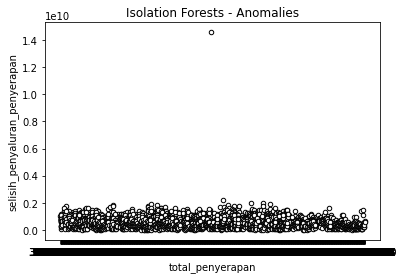

In [72]:
cmap=np.array(['white','red'])
plt.scatter(df_full_DBSCAN.iloc[:,0],df_full_DBSCAN.iloc[:,1],c='white',s=20,edgecolor='k')
# plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('total_penyerapan')
plt.ylabel('selisih_penyaluran_penyerapan')
plt.title('Isolation Forests - Anomalies')

<AxesSubplot:xlabel='selisih_penyaluran_penyerapan', ylabel='total_penyerapan'>

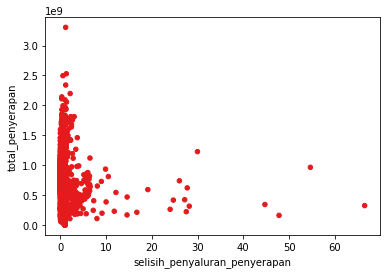

In [54]:
cmap = cm.get_cmap('Set1')
df_full_DBSCAN.plot.scatter(x='selisih_penyaluran_penyerapan',y='total_penyerapan', c=clusters, cmap=cmap,
 colorbar = False)